In [4]:
# libraries
import numpy as np # used for handling numbers
import pandas as pd # used for handling the dataset
from sklearn.impute import SimpleImputer # used for handling missing data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder # used for encoding categorical data
from sklearn.model_selection import train_test_split # used for splitting training and testing data
from sklearn.preprocessing import StandardScaler # used for feature scaling

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
dataset = pd.read_csv('Crop_recommendation.csv') # to import the dataset into a variable
# Splitting the attributes into independent and dependent attributes
X = dataset.iloc[:, :-1].values # attributes to determine dependent variable / Class
Y = dataset.iloc[:, -1].values # dependent variable / Class

In [6]:
X

array([[ 90.        ,  42.        ,  43.        , ...,  82.00274423,
          6.50298529, 202.9355362 ],
       [ 85.        ,  58.        ,  41.        , ...,  80.31964408,
          7.03809636, 226.6555374 ],
       [ 60.        ,  55.        ,  44.        , ...,  82.3207629 ,
          7.84020714, 263.9642476 ],
       ...,
       [118.        ,  33.        ,  30.        , ...,  67.22512329,
          6.36260785, 173.3228386 ],
       [117.        ,  32.        ,  34.        , ...,  52.12739421,
          6.75879255, 127.1752928 ],
       [104.        ,  18.        ,  30.        , ...,  60.39647474,
          6.77983261, 140.9370415 ]])

In [7]:
Y
type(Y)

numpy.ndarray

In [8]:
dataset.isnull().sum().sum()

0

In [9]:
dataset

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [11]:
dataset.nunique(axis=0)

N               137
P               117
K                73
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label            22
dtype: int64

Text(0, 0.5, 'humidity')

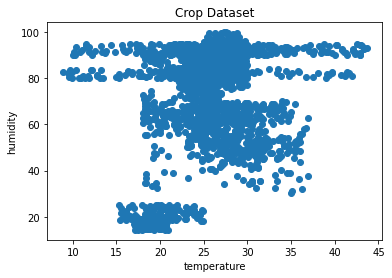

In [12]:
# create a figure and axis
fig, ax = plt.subplots()

# scatter the sepal_length against the sepal_width
ax.scatter(dataset['temperature'], dataset['humidity'])
# set a title and labels
ax.set_title('Crop Dataset')
ax.set_xlabel('temperature')
ax.set_ylabel('humidity')

array([[<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>]], dtype=object)

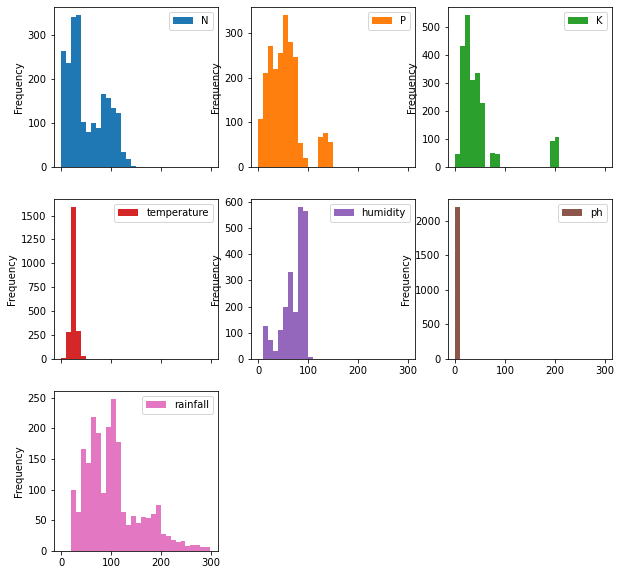

In [13]:
dataset.plot.hist(subplots=True, layout=(3,3), figsize=(10, 10), bins=30)

<AxesSubplot:xlabel='N'>

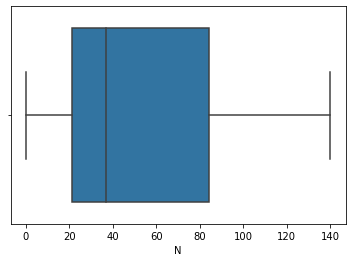

In [14]:
sns.boxplot(x=dataset['N'])

<AxesSubplot:xlabel='K'>

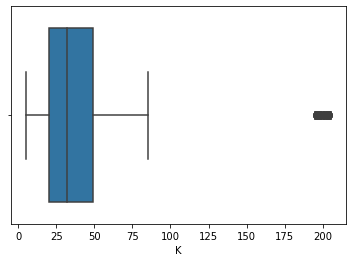

In [15]:
sns.boxplot(x=dataset['K'])

<AxesSubplot:xlabel='P'>

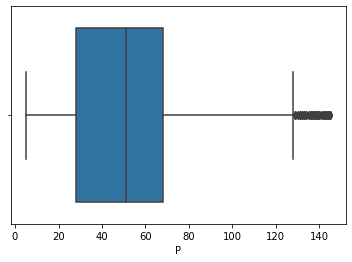

In [16]:
sns.boxplot(x=dataset['P'])

<AxesSubplot:xlabel='ph'>

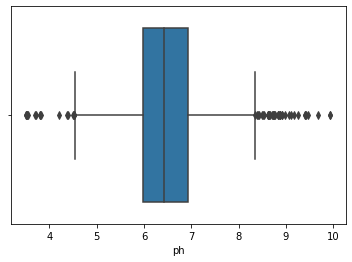

In [17]:
sns.boxplot(x=dataset['ph'])

<AxesSubplot:xlabel='temperature'>

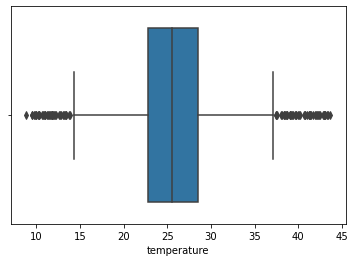

In [18]:
sns.boxplot(x=dataset['temperature'])

<AxesSubplot:xlabel='rainfall'>

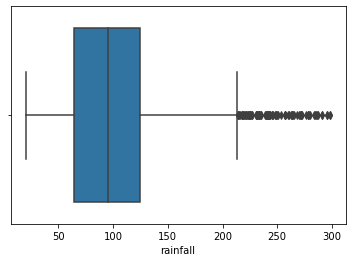

In [19]:
sns.boxplot(x=dataset['rainfall'])

<AxesSubplot:xlabel='humidity'>

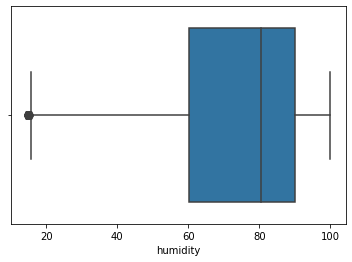

In [20]:
sns.boxplot(x=dataset['humidity'])

<BarContainer object of 2200 artists>

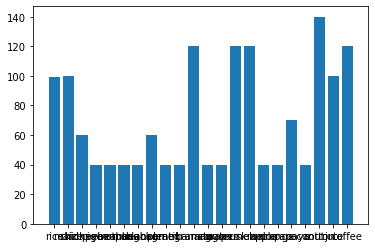

In [21]:
plt.bar(dataset['label'], dataset['N'])

In [22]:
gk = dataset.groupby('label')
gk.first()

,N,P,K,temperature,humidity,ph,rainfall
label,,,,,,,
apple,24,128,196,22.750888,90.694892,5.521467,110.431786
banana,91,94,46,29.367924,76.249001,6.149934,92.828409
blackgram,56,79,15,29.484400,63.199153,7.454532,71.890907
chickpea,40,72,77,17.024985,16.988612,7.485996,88.551231
coconut,18,30,29,26.762749,92.860569,6.420019,224.590366
coffee,91,21,26,26.333780,57.364700,7.261314,191.654941
cotton,133,47,24,24.402289,79.197320,7.231325,90.802236
grapes,24,130,195,29.996772,81.541566,6.112306,67.125345
jute,89,47,38,25.524690,72.248508,6.002525,151.886997


<ipython-input-23-809bdbf13be9>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  gk.get_group('watermelon').hist(ax = ax)


array([[<AxesSubplot:title={'center':'N'}>,
        <AxesSubplot:title={'center':'P'}>,
        <AxesSubplot:title={'center':'K'}>],
       [<AxesSubplot:title={'center':'temperature'}>,
        <AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'ph'}>],
       [<AxesSubplot:title={'center':'rainfall'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

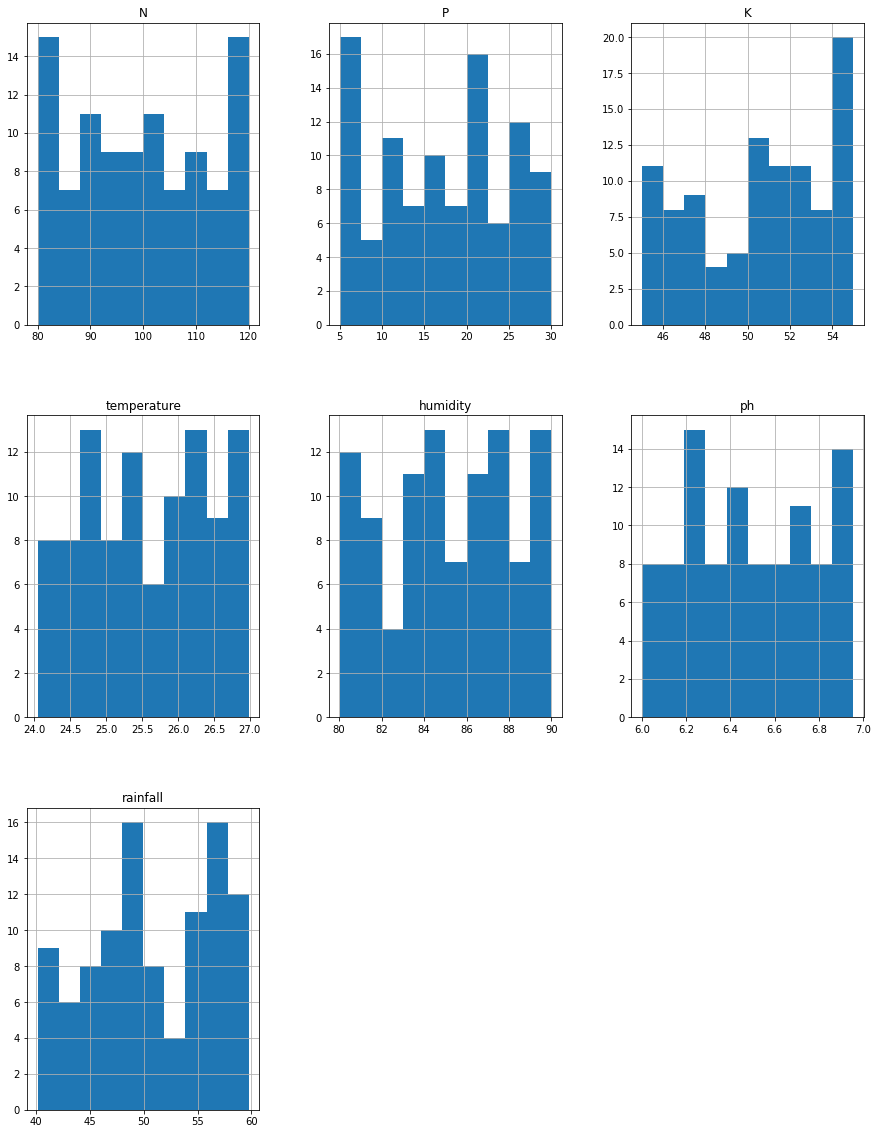

In [23]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
gk.get_group('watermelon').hist(ax = ax)

<ipython-input-24-211485bf9ab5>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  gk.get_group('apple').hist(ax = ax)


array([[<AxesSubplot:title={'center':'N'}>,
        <AxesSubplot:title={'center':'P'}>,
        <AxesSubplot:title={'center':'K'}>],
       [<AxesSubplot:title={'center':'temperature'}>,
        <AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'ph'}>],
       [<AxesSubplot:title={'center':'rainfall'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

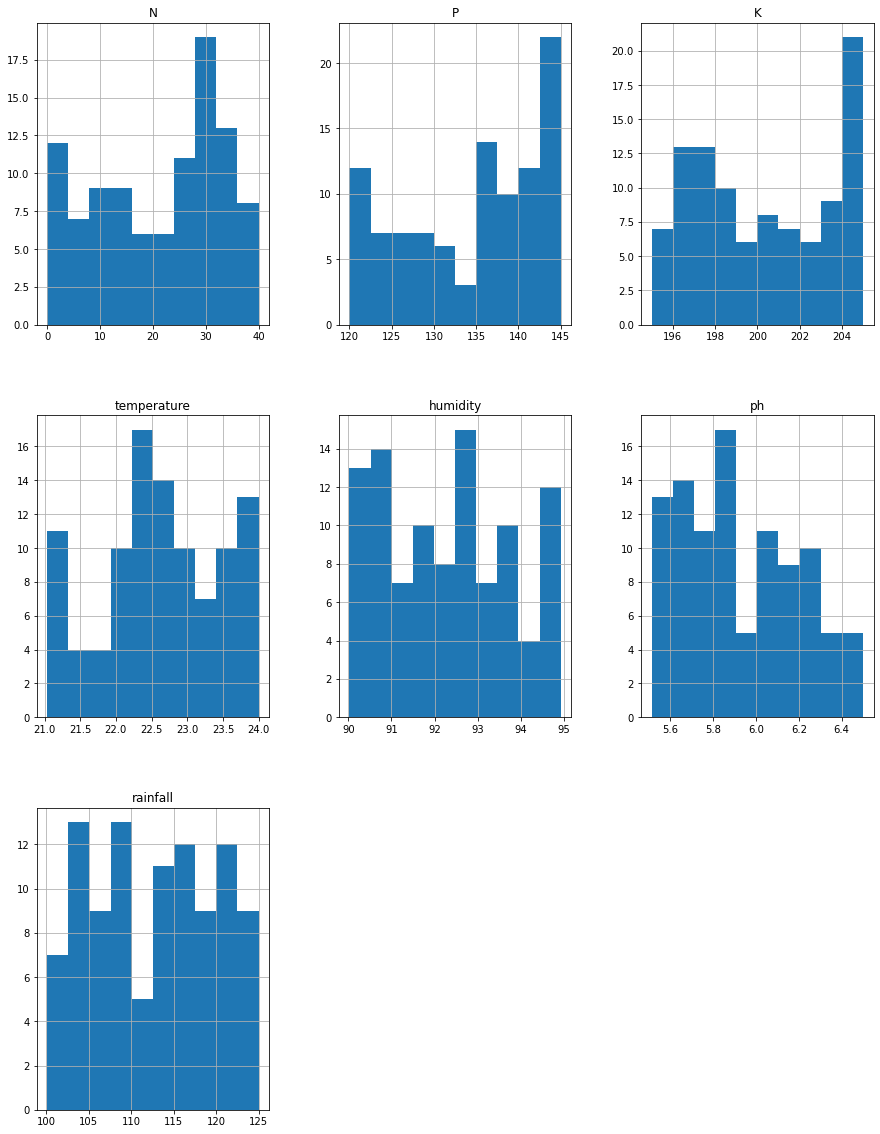

In [24]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
gk.get_group('apple').hist(ax = ax)

<ipython-input-25-4125b19a9657>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  gk.get_group('banana').hist(ax = ax)


array([[<AxesSubplot:title={'center':'N'}>,
        <AxesSubplot:title={'center':'P'}>,
        <AxesSubplot:title={'center':'K'}>],
       [<AxesSubplot:title={'center':'temperature'}>,
        <AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'ph'}>],
       [<AxesSubplot:title={'center':'rainfall'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

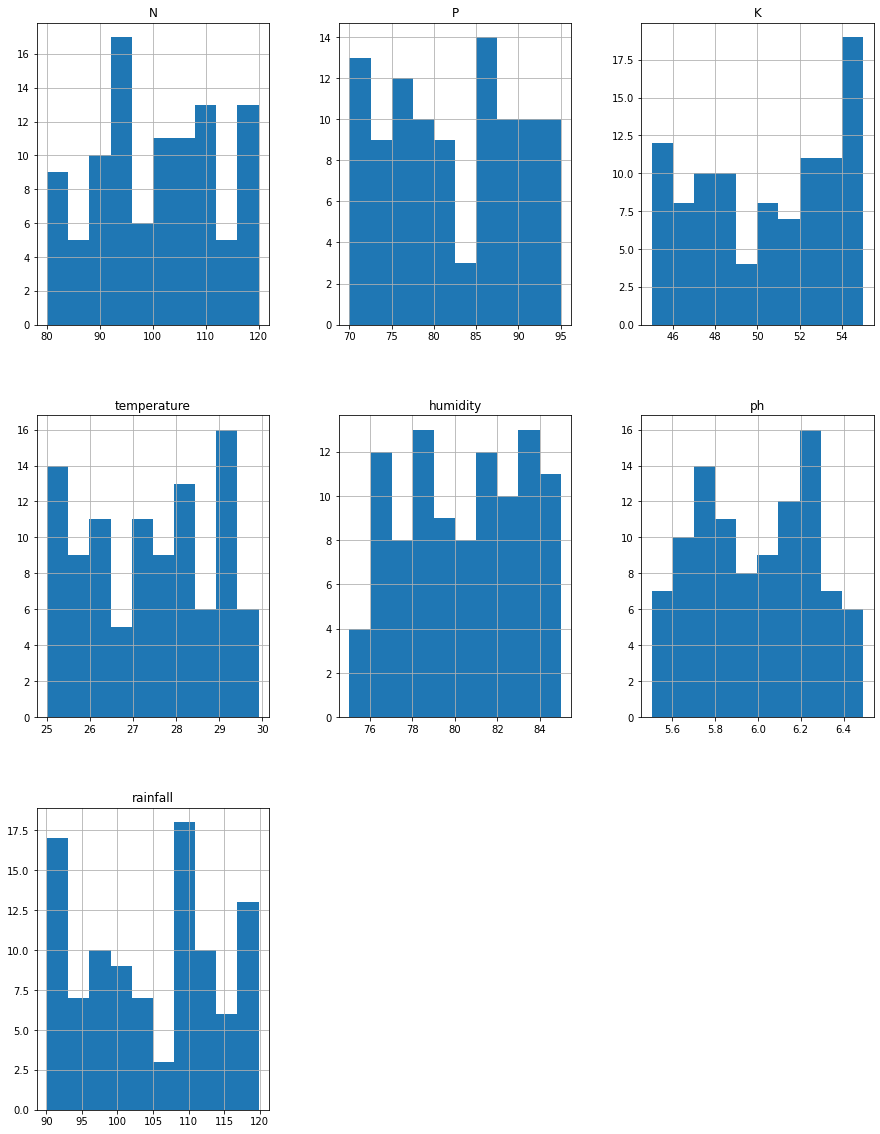

In [25]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
gk.get_group('banana').hist(ax = ax)

In [26]:
#apple,banana,blackgram,chickpea,coconut,coffee,cotton,grapes,jute,kidneybeans,lentil,maize,mango,mothbeans,mungbean,muskmelon
#orange,papaya,pigeonpeas,pomegranate,rice,watermelon

<ipython-input-27-eff365ae1aa5>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  gk.get_group('blackgram').hist(ax = ax)


array([[<AxesSubplot:title={'center':'N'}>,
        <AxesSubplot:title={'center':'P'}>,
        <AxesSubplot:title={'center':'K'}>],
       [<AxesSubplot:title={'center':'temperature'}>,
        <AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'ph'}>],
       [<AxesSubplot:title={'center':'rainfall'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

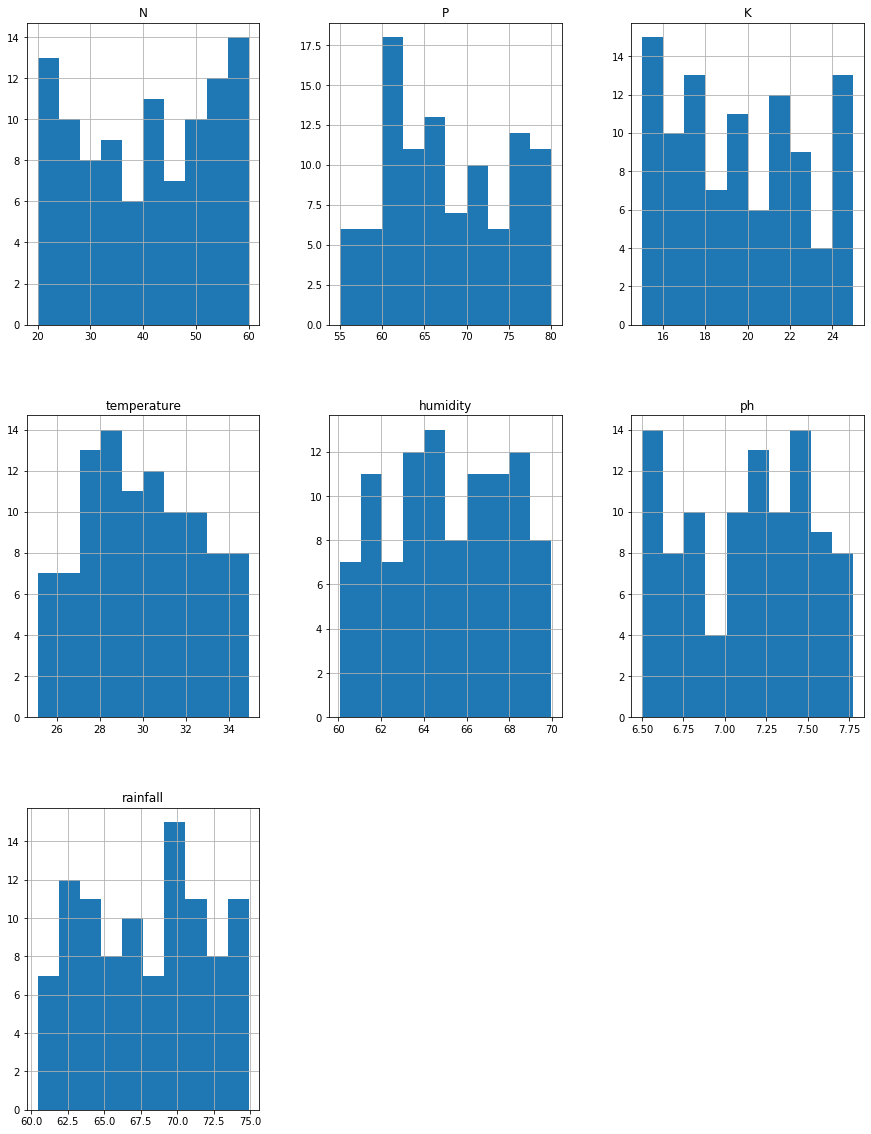

In [27]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
gk.get_group('blackgram').hist(ax = ax)

<ipython-input-28-10ab1de07673>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  gk.get_group('chickpea').hist(ax = ax)


array([[<AxesSubplot:title={'center':'N'}>,
        <AxesSubplot:title={'center':'P'}>,
        <AxesSubplot:title={'center':'K'}>],
       [<AxesSubplot:title={'center':'temperature'}>,
        <AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'ph'}>],
       [<AxesSubplot:title={'center':'rainfall'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

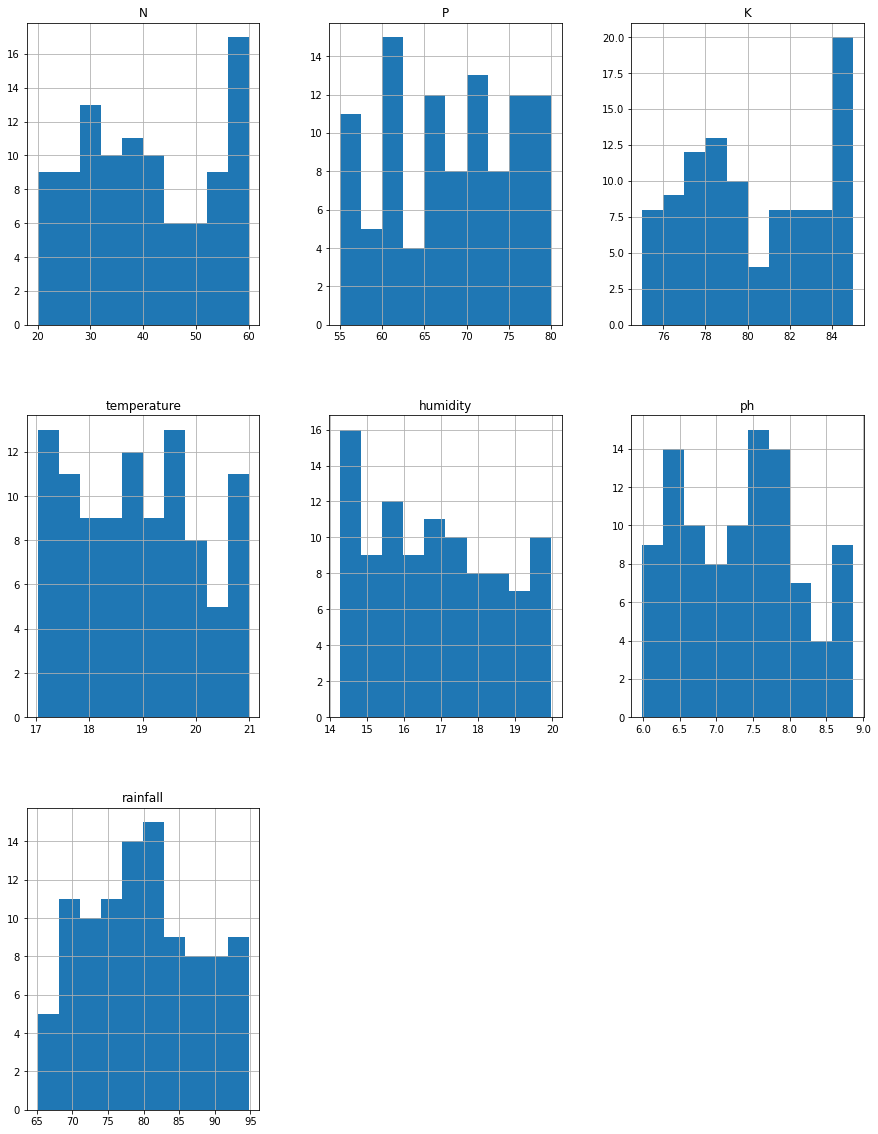

In [28]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
gk.get_group('chickpea').hist(ax = ax)

<ipython-input-29-ee00be6799ea>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  gk.get_group('coconut').hist(ax = ax)


array([[<AxesSubplot:title={'center':'N'}>,
        <AxesSubplot:title={'center':'P'}>,
        <AxesSubplot:title={'center':'K'}>],
       [<AxesSubplot:title={'center':'temperature'}>,
        <AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'ph'}>],
       [<AxesSubplot:title={'center':'rainfall'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

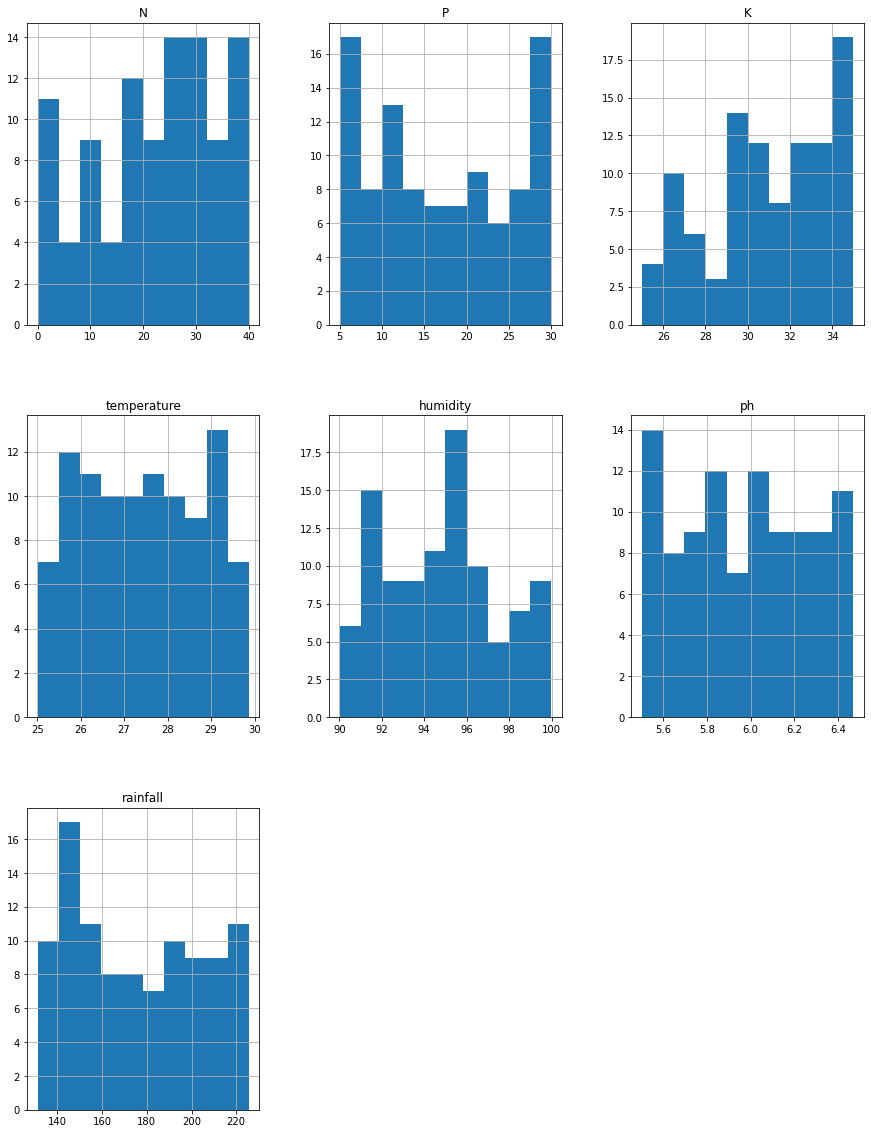

In [29]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
gk.get_group('coconut').hist(ax = ax)

<ipython-input-30-7de05ede7245>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  gk.get_group('coffee').hist(ax = ax)


array([[<AxesSubplot:title={'center':'N'}>,
        <AxesSubplot:title={'center':'P'}>,
        <AxesSubplot:title={'center':'K'}>],
       [<AxesSubplot:title={'center':'temperature'}>,
        <AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'ph'}>],
       [<AxesSubplot:title={'center':'rainfall'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

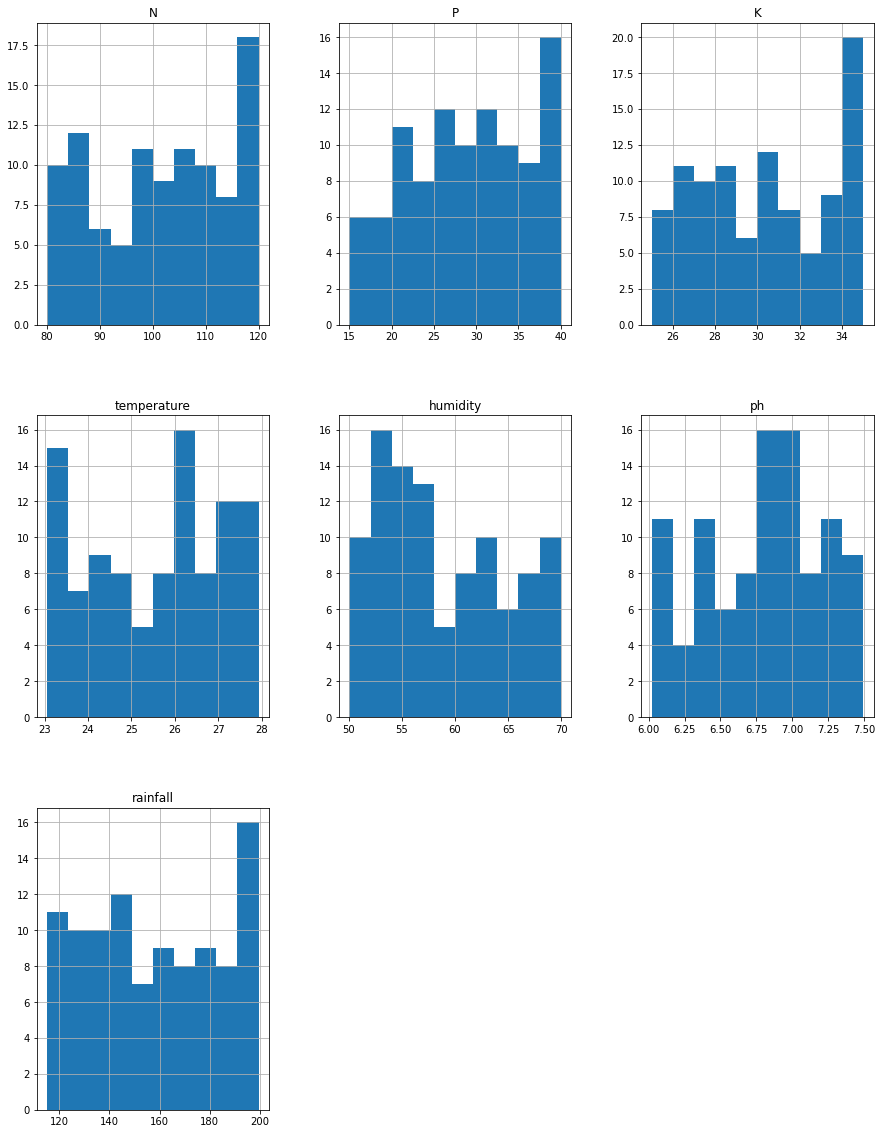

In [30]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
gk.get_group('coffee').hist(ax = ax)

<ipython-input-31-e12a625fc4b9>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  gk.get_group('cotton').hist(ax = ax)


array([[<AxesSubplot:title={'center':'N'}>,
        <AxesSubplot:title={'center':'P'}>,
        <AxesSubplot:title={'center':'K'}>],
       [<AxesSubplot:title={'center':'temperature'}>,
        <AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'ph'}>],
       [<AxesSubplot:title={'center':'rainfall'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

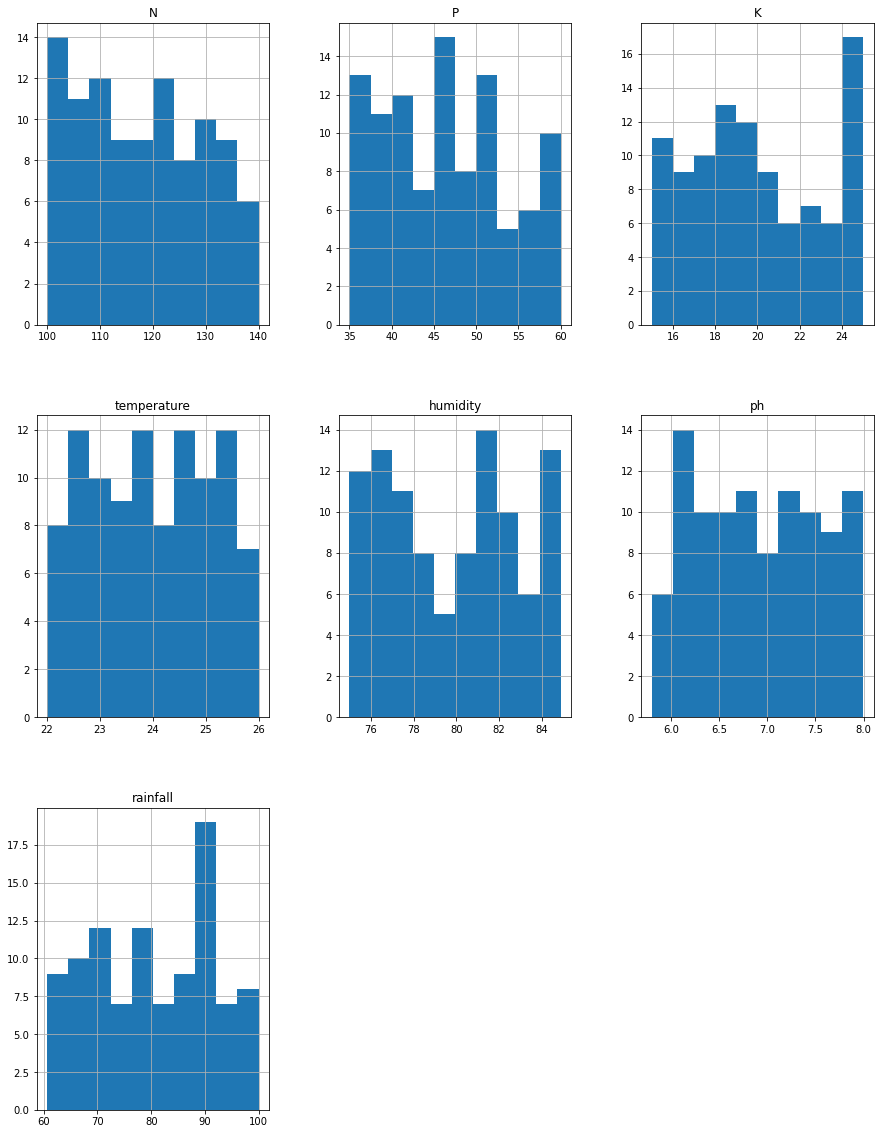

In [31]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
gk.get_group('cotton').hist(ax = ax)

<ipython-input-32-faa9cb780aec>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  gk.get_group('grapes').hist(ax = ax)


array([[<AxesSubplot:title={'center':'N'}>,
        <AxesSubplot:title={'center':'P'}>,
        <AxesSubplot:title={'center':'K'}>],
       [<AxesSubplot:title={'center':'temperature'}>,
        <AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'ph'}>],
       [<AxesSubplot:title={'center':'rainfall'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

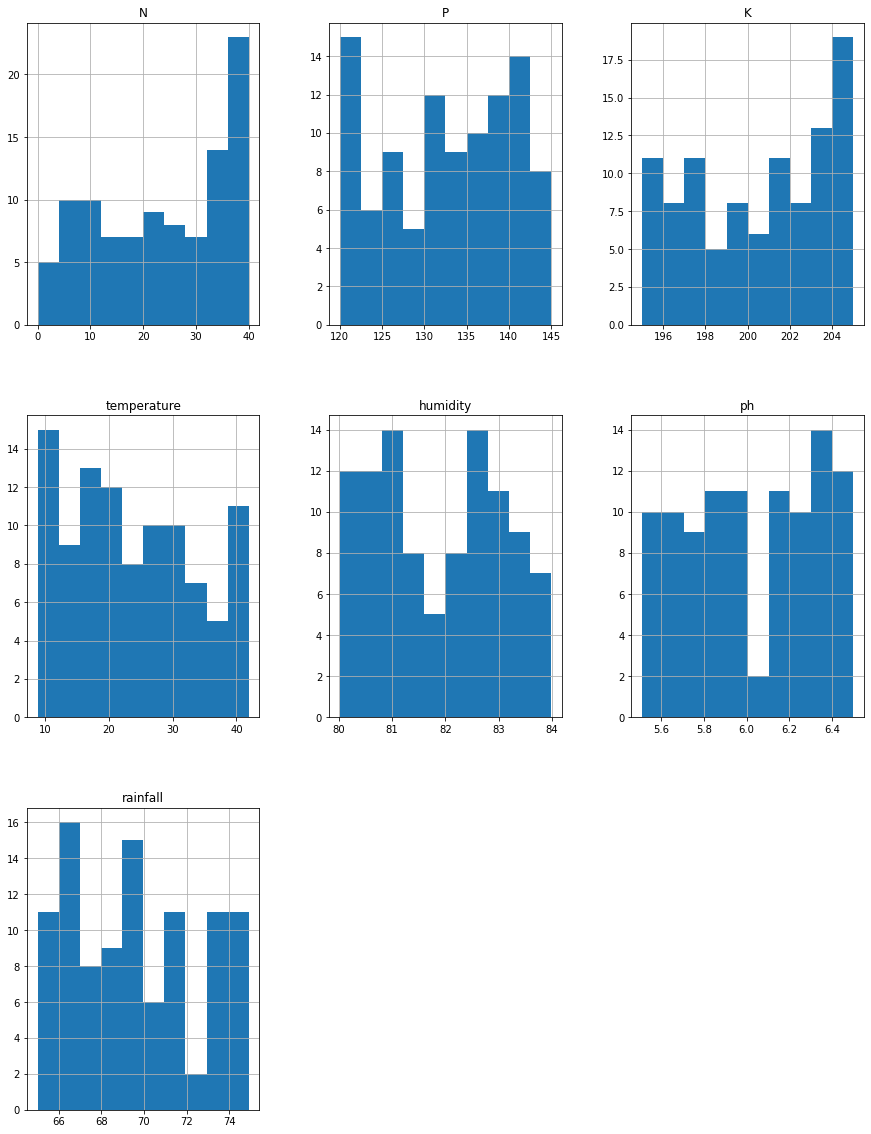

In [32]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
gk.get_group('grapes').hist(ax = ax)

<ipython-input-33-174d69dfe5a9>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  gk.get_group('jute').hist(ax = ax)


array([[<AxesSubplot:title={'center':'N'}>,
        <AxesSubplot:title={'center':'P'}>,
        <AxesSubplot:title={'center':'K'}>],
       [<AxesSubplot:title={'center':'temperature'}>,
        <AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'ph'}>],
       [<AxesSubplot:title={'center':'rainfall'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

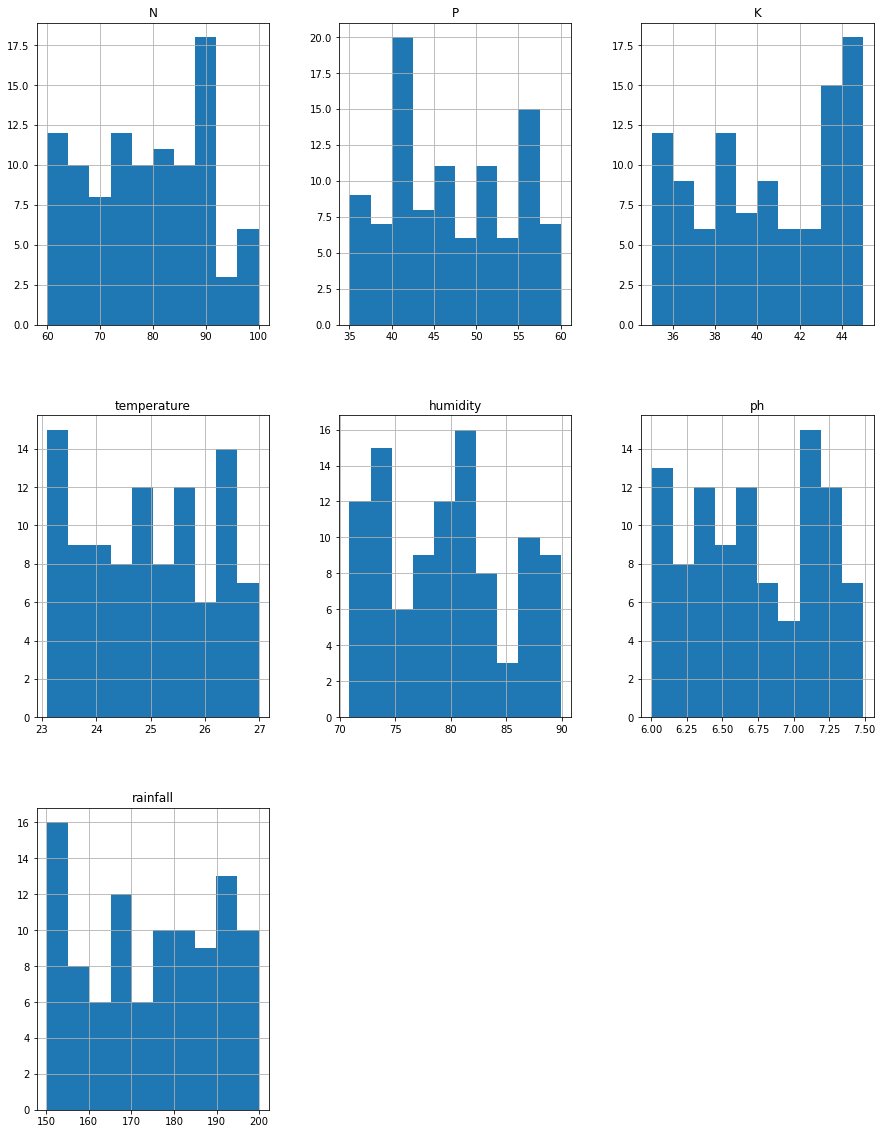

In [33]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
gk.get_group('jute').hist(ax = ax)

<ipython-input-34-852f5b15ce37>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  gk.get_group('kidneybeans').hist(ax = ax)


array([[<AxesSubplot:title={'center':'N'}>,
        <AxesSubplot:title={'center':'P'}>,
        <AxesSubplot:title={'center':'K'}>],
       [<AxesSubplot:title={'center':'temperature'}>,
        <AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'ph'}>],
       [<AxesSubplot:title={'center':'rainfall'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

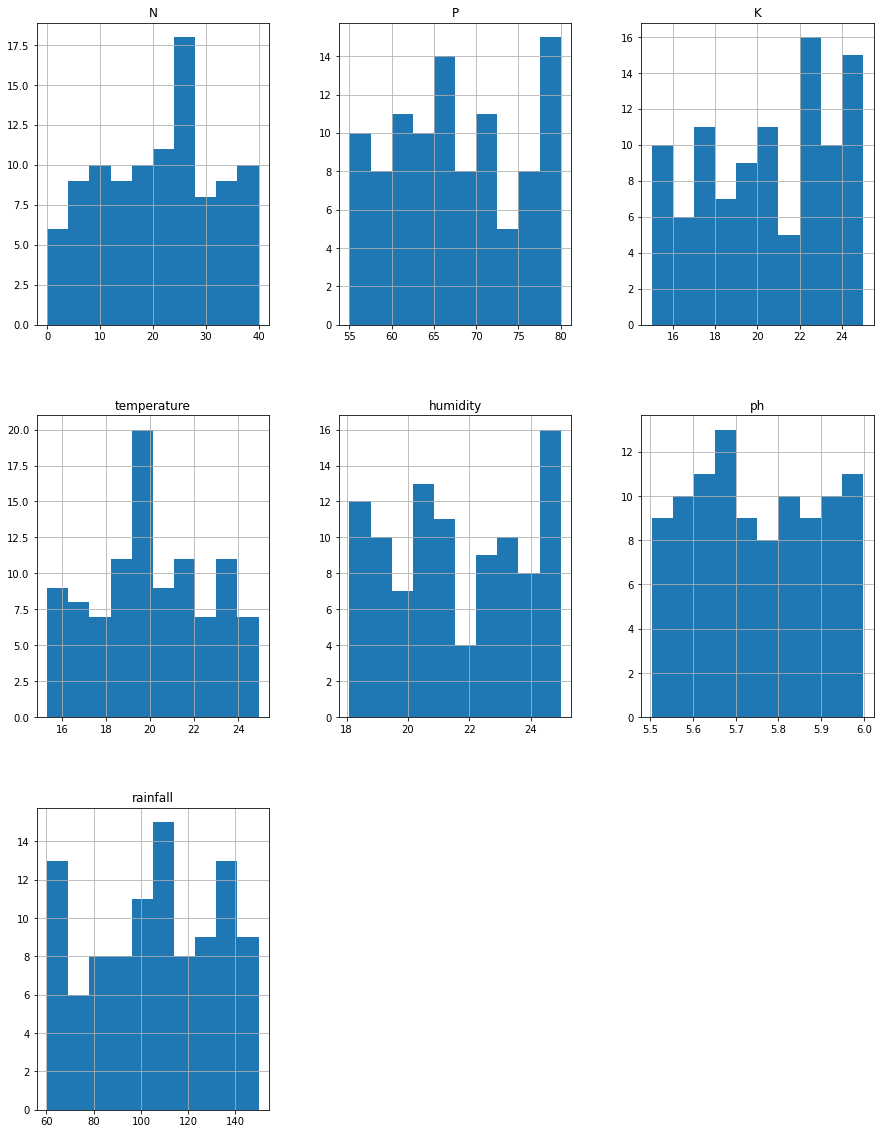

In [34]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
gk.get_group('kidneybeans').hist(ax = ax)

<ipython-input-35-1cff139da6a6>:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  gk.get_group('lentil').hist(ax = ax)


array([[<AxesSubplot:title={'center':'N'}>,
        <AxesSubplot:title={'center':'P'}>,
        <AxesSubplot:title={'center':'K'}>],
       [<AxesSubplot:title={'center':'temperature'}>,
        <AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'ph'}>],
       [<AxesSubplot:title={'center':'rainfall'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

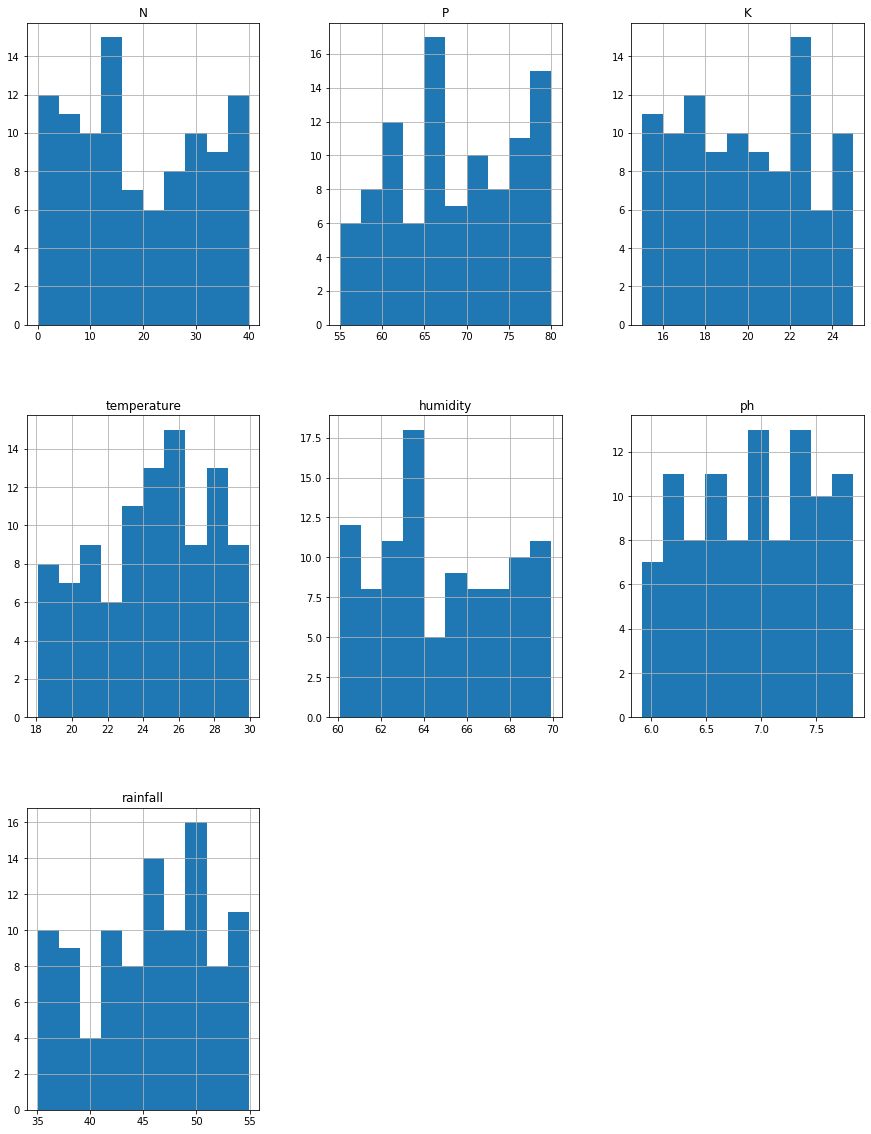

In [35]:
#apple,banana,blackgram,chickpea,coconut,coffee,cotton,grapes,jute,kidneybeans,lentil,maize,mango,mothbeans,mungbean,muskmelon
#orange,papaya,pigeonpeas,pomegranate,rice,watermelon
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
gk.get_group('lentil').hist(ax = ax)

<ipython-input-36-5e06124a5776>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  gk.get_group('maize').hist(ax = ax)


array([[<AxesSubplot:title={'center':'N'}>,
        <AxesSubplot:title={'center':'P'}>,
        <AxesSubplot:title={'center':'K'}>],
       [<AxesSubplot:title={'center':'temperature'}>,
        <AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'ph'}>],
       [<AxesSubplot:title={'center':'rainfall'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

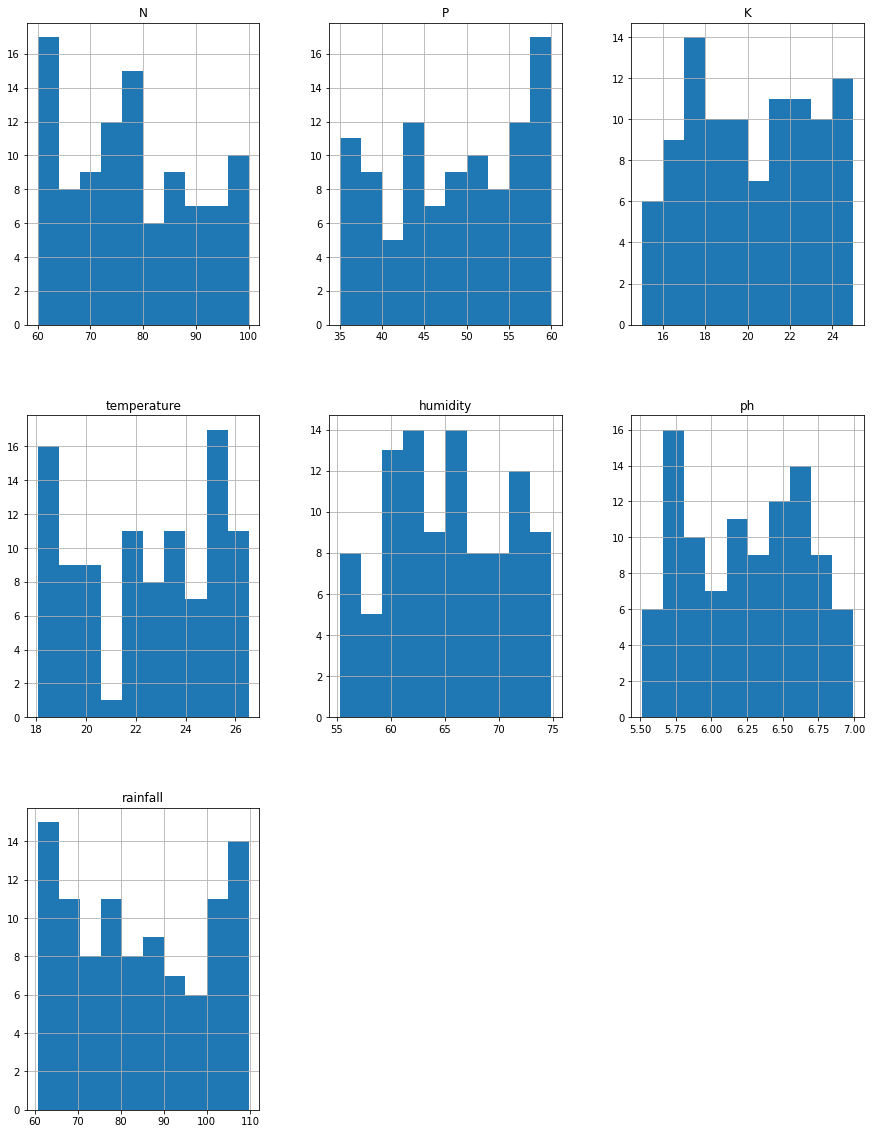

In [36]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
gk.get_group('maize').hist(ax = ax)

<ipython-input-37-c37269ce1e23>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  gk.get_group('mango').hist(ax = ax)


array([[<AxesSubplot:title={'center':'N'}>,
        <AxesSubplot:title={'center':'P'}>,
        <AxesSubplot:title={'center':'K'}>],
       [<AxesSubplot:title={'center':'temperature'}>,
        <AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'ph'}>],
       [<AxesSubplot:title={'center':'rainfall'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

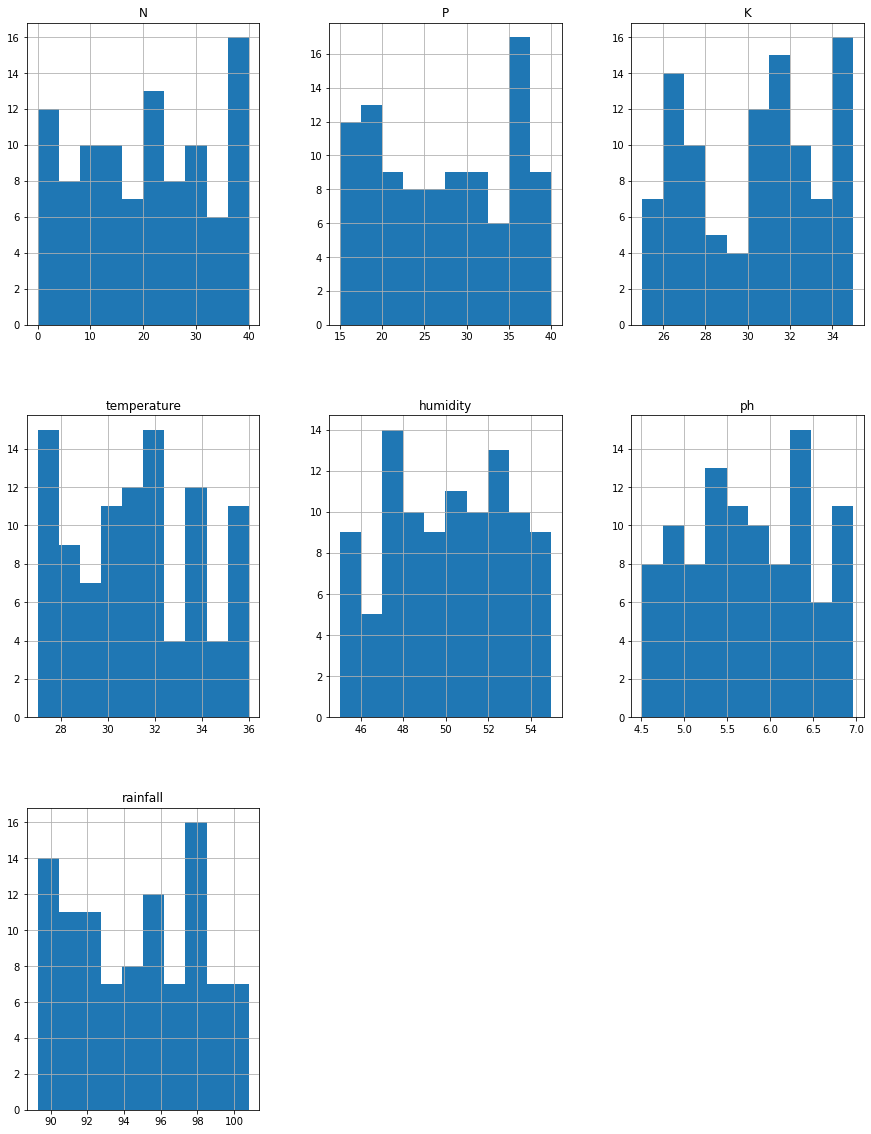

In [37]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
gk.get_group('mango').hist(ax = ax)

<ipython-input-38-1b53f2afc1bf>:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  gk.get_group('mothbeans').hist(ax = ax)


array([[<AxesSubplot:title={'center':'N'}>,
        <AxesSubplot:title={'center':'P'}>,
        <AxesSubplot:title={'center':'K'}>],
       [<AxesSubplot:title={'center':'temperature'}>,
        <AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'ph'}>],
       [<AxesSubplot:title={'center':'rainfall'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

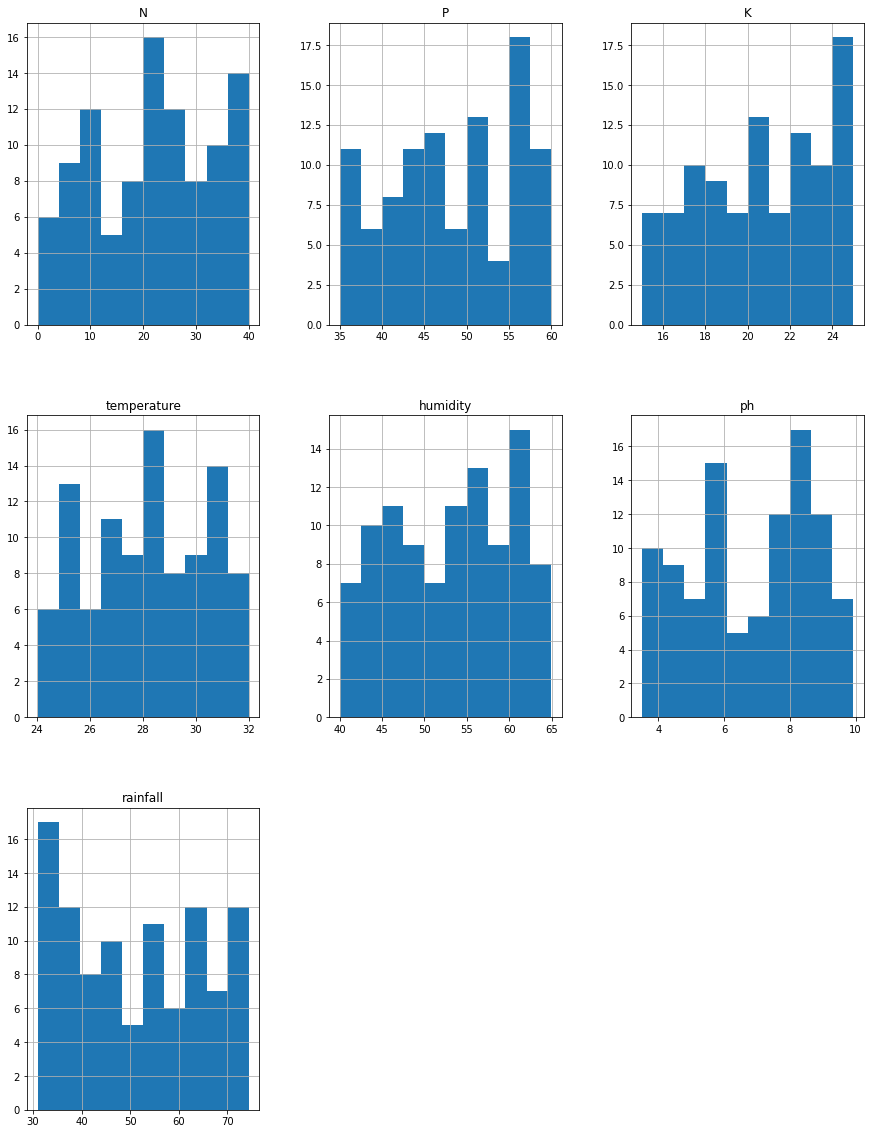

In [38]:
#apple,banana,blackgram,chickpea,coconut,coffee,cotton,grapes,jute,kidneybeans,lentil,maize,mango,mothbeans,mungbean,muskmelon
#orange,papaya,pigeonpeas,pomegranate,rice,watermelon
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
gk.get_group('mothbeans').hist(ax = ax)

<ipython-input-39-40a9104eefae>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  gk.get_group('mungbean').hist(ax = ax)


array([[<AxesSubplot:title={'center':'N'}>,
        <AxesSubplot:title={'center':'P'}>,
        <AxesSubplot:title={'center':'K'}>],
       [<AxesSubplot:title={'center':'temperature'}>,
        <AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'ph'}>],
       [<AxesSubplot:title={'center':'rainfall'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

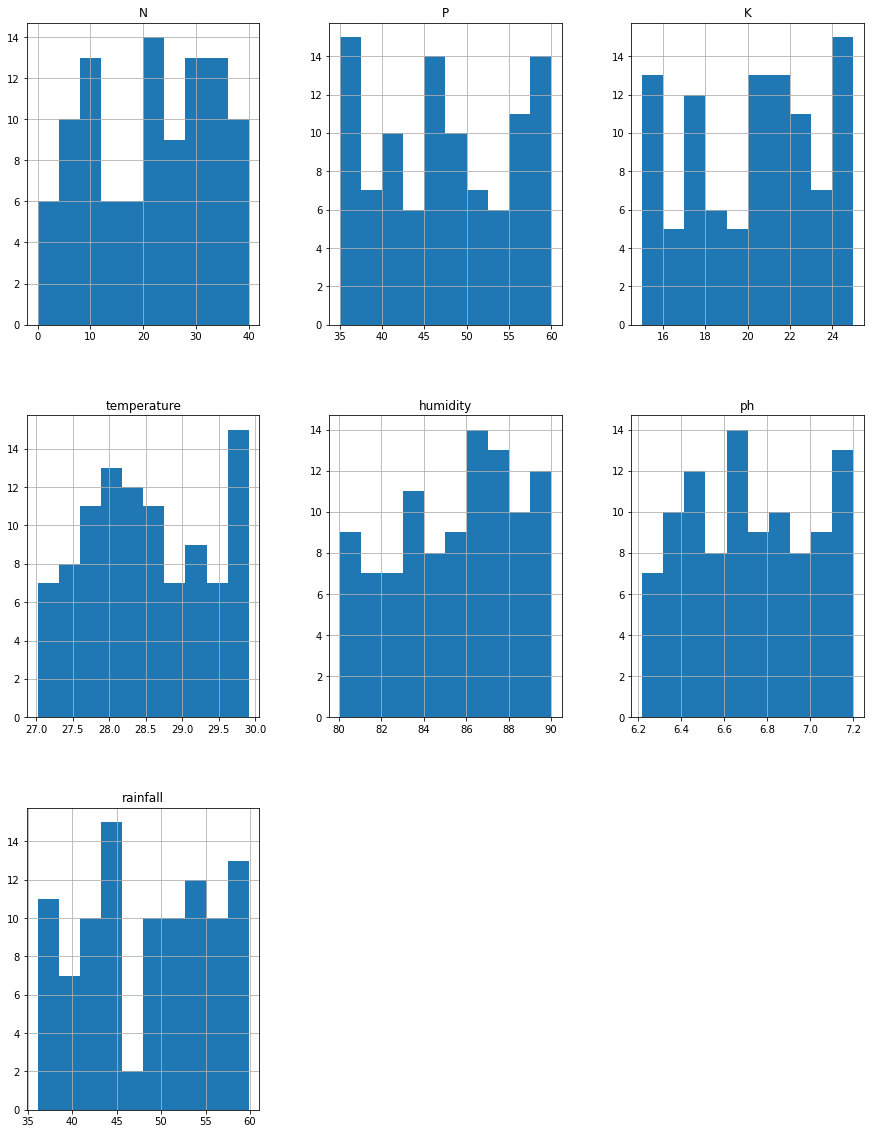

In [39]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
gk.get_group('mungbean').hist(ax = ax)

<ipython-input-40-94c060a0ec6e>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  gk.get_group('muskmelon').hist(ax = ax)


array([[<AxesSubplot:title={'center':'N'}>,
        <AxesSubplot:title={'center':'P'}>,
        <AxesSubplot:title={'center':'K'}>],
       [<AxesSubplot:title={'center':'temperature'}>,
        <AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'ph'}>],
       [<AxesSubplot:title={'center':'rainfall'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

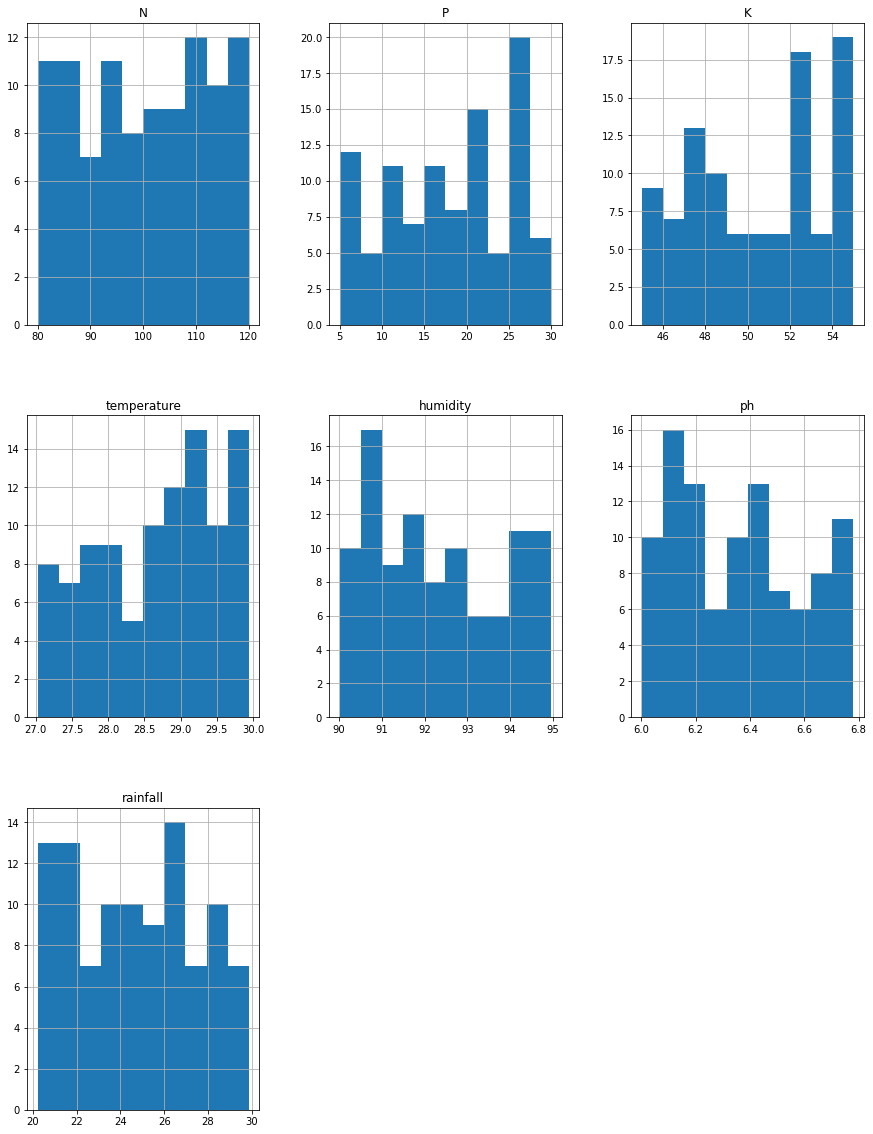

In [40]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
gk.get_group('muskmelon').hist(ax = ax)

<ipython-input-41-287bcd0dda61>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  gk.get_group('orange').hist(ax = ax)


array([[<AxesSubplot:title={'center':'N'}>,
        <AxesSubplot:title={'center':'P'}>,
        <AxesSubplot:title={'center':'K'}>],
       [<AxesSubplot:title={'center':'temperature'}>,
        <AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'ph'}>],
       [<AxesSubplot:title={'center':'rainfall'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

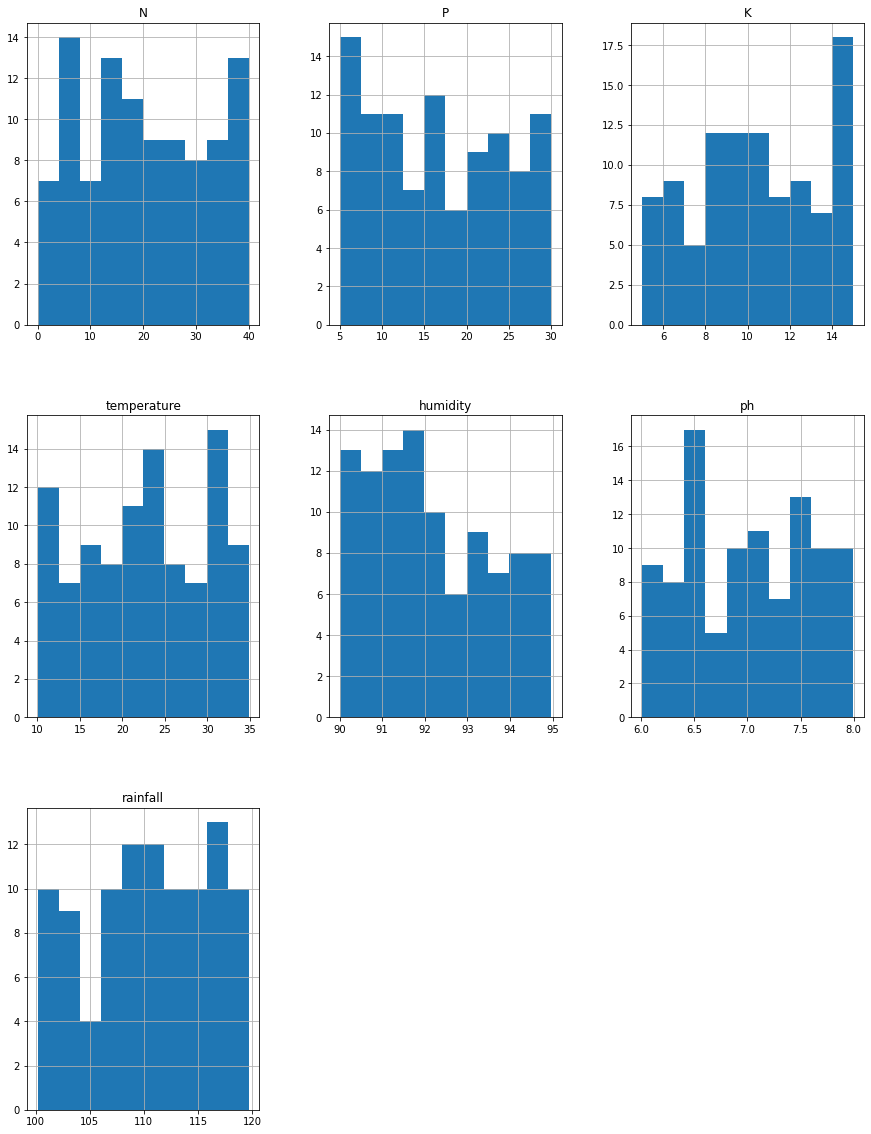

In [41]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
gk.get_group('orange').hist(ax = ax)

<ipython-input-42-5a27915e966e>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  gk.get_group('papaya').hist(ax = ax)


array([[<AxesSubplot:title={'center':'N'}>,
        <AxesSubplot:title={'center':'P'}>,
        <AxesSubplot:title={'center':'K'}>],
       [<AxesSubplot:title={'center':'temperature'}>,
        <AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'ph'}>],
       [<AxesSubplot:title={'center':'rainfall'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

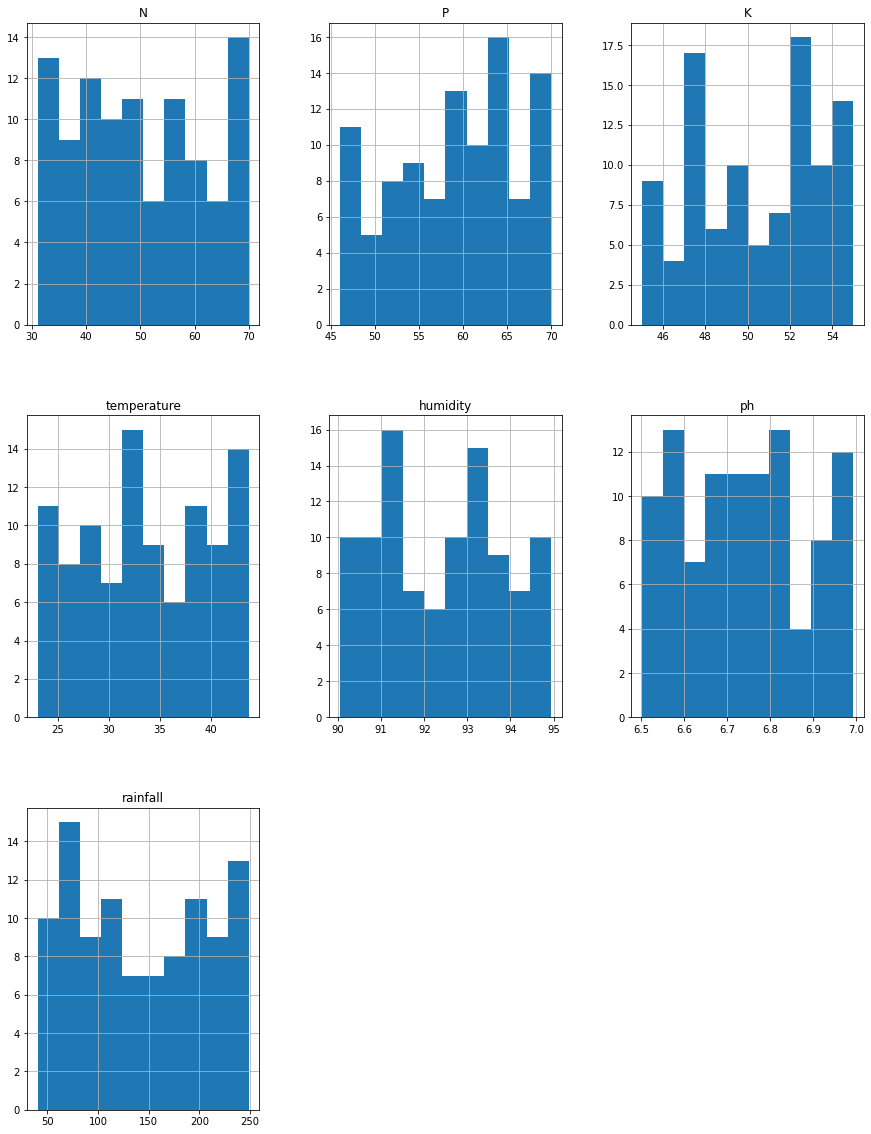

In [42]:
#orange,papaya,pigeonpeas,pomegranate,rice,watermelon
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
gk.get_group('papaya').hist(ax = ax)

<ipython-input-43-d38f068c6b9a>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  gk.get_group('pigeonpeas').hist(ax = ax)


array([[<AxesSubplot:title={'center':'N'}>,
        <AxesSubplot:title={'center':'P'}>,
        <AxesSubplot:title={'center':'K'}>],
       [<AxesSubplot:title={'center':'temperature'}>,
        <AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'ph'}>],
       [<AxesSubplot:title={'center':'rainfall'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

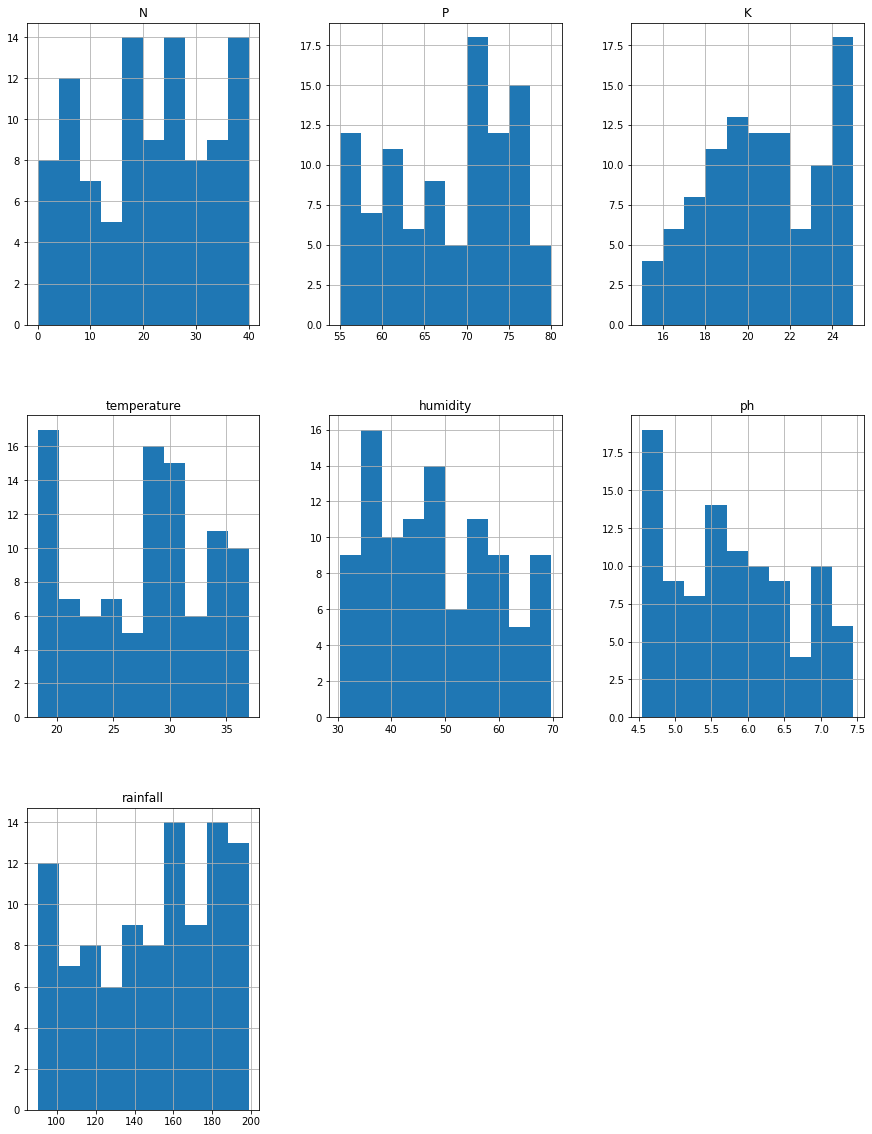

In [43]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
gk.get_group('pigeonpeas').hist(ax = ax)

<ipython-input-44-68d488db159b>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  gk.get_group('pomegranate').hist(ax = ax)


array([[<AxesSubplot:title={'center':'N'}>,
        <AxesSubplot:title={'center':'P'}>,
        <AxesSubplot:title={'center':'K'}>],
       [<AxesSubplot:title={'center':'temperature'}>,
        <AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'ph'}>],
       [<AxesSubplot:title={'center':'rainfall'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

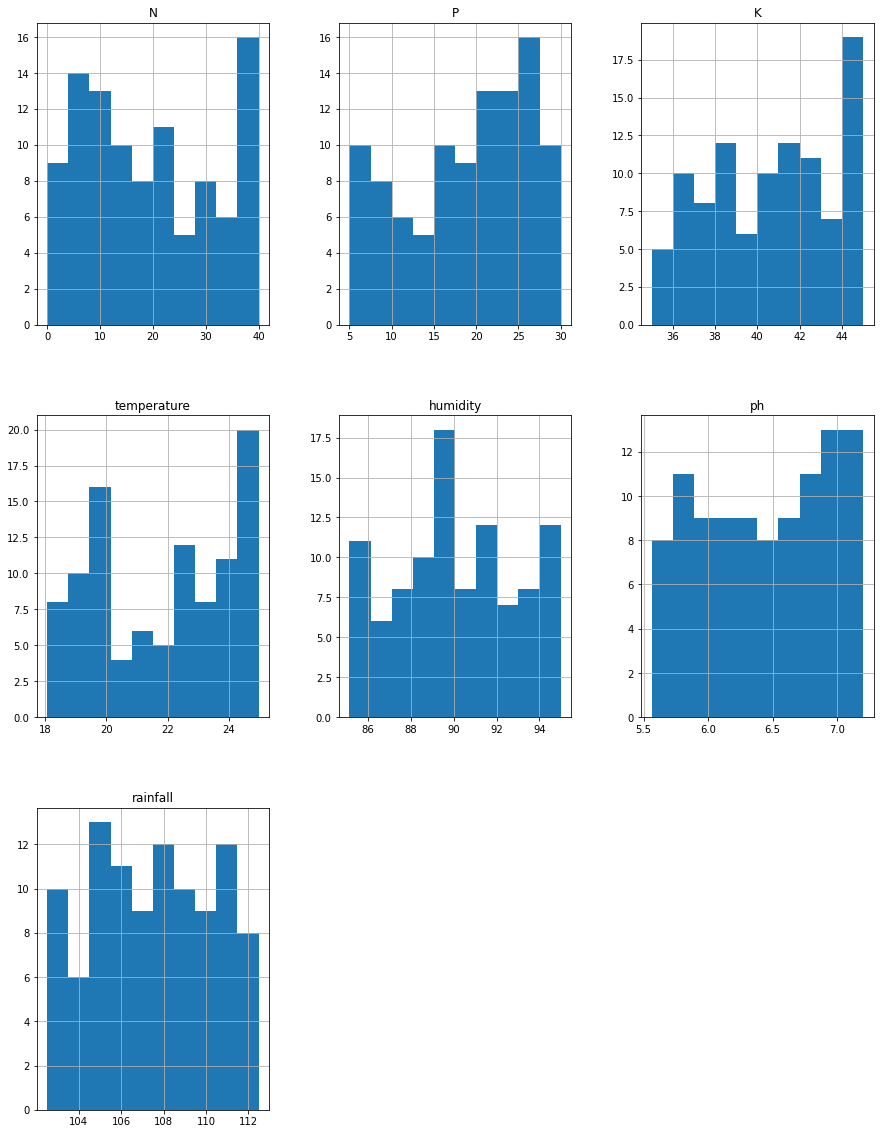

In [44]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
gk.get_group('pomegranate').hist(ax = ax)

<ipython-input-45-7dfc83aad518>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  gk.get_group('rice').hist(ax = ax)


array([[<AxesSubplot:title={'center':'N'}>,
        <AxesSubplot:title={'center':'P'}>,
        <AxesSubplot:title={'center':'K'}>],
       [<AxesSubplot:title={'center':'temperature'}>,
        <AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'ph'}>],
       [<AxesSubplot:title={'center':'rainfall'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

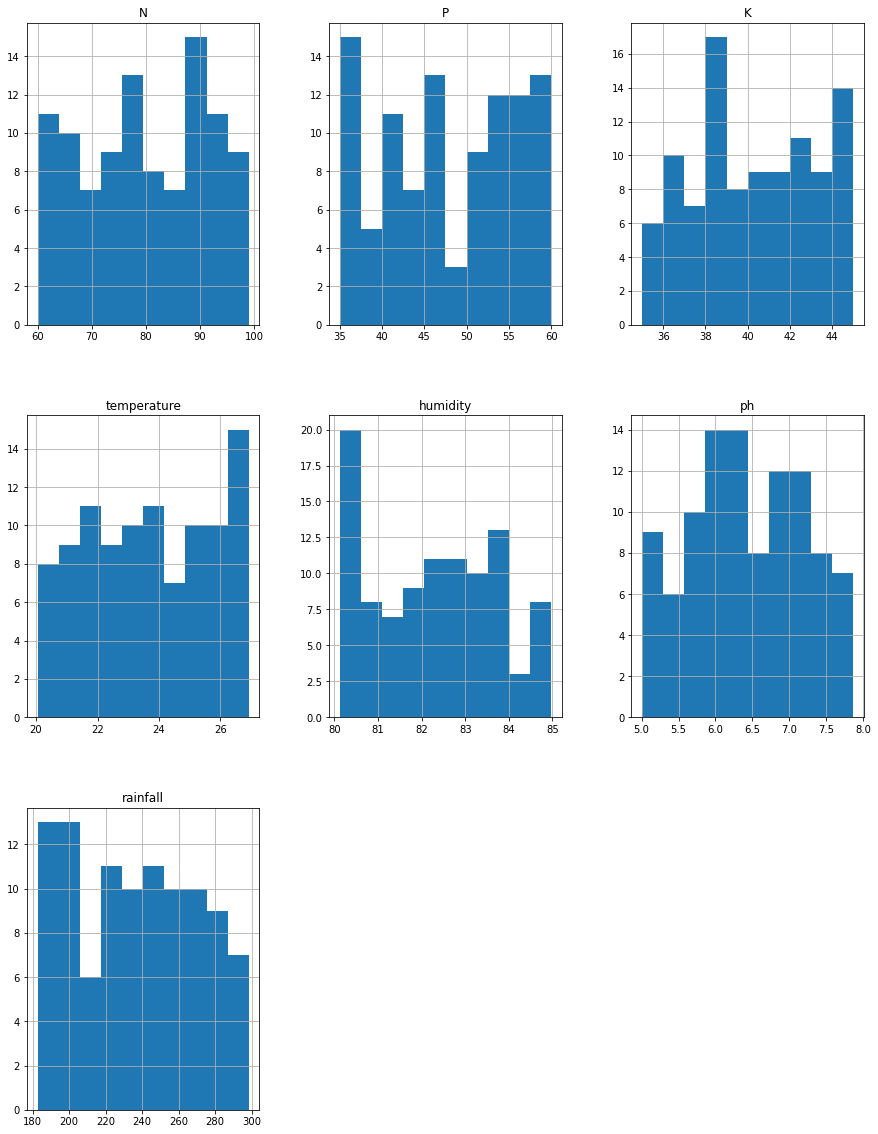

In [45]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
gk.get_group('rice').hist(ax = ax)

In [46]:
# category percent among the total data
data_size = len(dataset)
dataset['label'].value_counts()/ data_size * 100

mothbeans      4.545455
mango          4.545455
jute           4.545455
blackgram      4.545455
rice           4.545455
coffee         4.545455
grapes         4.545455
maize          4.545455
watermelon     4.545455
kidneybeans    4.545455
pigeonpeas     4.545455
apple          4.545455
muskmelon      4.545455
coconut        4.545455
chickpea       4.545455
banana         4.545455
lentil         4.545455
mungbean       4.545455
papaya         4.545455
pomegranate    4.545455
cotton         4.545455
orange         4.545455
Name: label, dtype: float64

In [47]:
text_data = dataset[:]
print("data count :-",len(text_data))

data count :- 2200


In [48]:
duplicate_text_data = text_data[text_data.duplicated()]
print("duplicate data count :-",len(duplicate_text_data))

duplicate data count :- 0


In [49]:
!python -m pip install -U sklearn

In [50]:
import sklearn
sklearn.__version__

'0.24.1'

In [53]:
dataset[1000:1010]

,N,P,K,temperature,humidity,ph,rainfall,label
1000,91,94,46,29.367924,76.249001,6.149934,92.828409,banana
1001,105,95,50,27.333690,83.676752,5.849076,101.049479,banana
1002,108,92,53,27.400536,82.962213,6.276800,104.937800,banana
1003,86,76,54,29.315908,80.115857,5.926825,90.109781,banana
1004,80,77,49,26.054330,79.396545,5.519088,113.229737,banana
1005,93,94,53,25.866324,84.423793,6.079179,114.535750,banana
1006,90,92,55,27.009321,80.185468,6.134656,97.325317,banana
1007,108,89,53,29.550548,78.067628,5.808498,99.344822,banana
1008,108,88,55,26.288460,83.390039,5.891458,113.872980,banana
1009,105,77,52,29.162266,76.161516,5.816622,100.007568,banana
